In [1]:
import os
import pandas as pd
import pyfixest as pf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as GridSpec
import warnings
warnings.filterwarnings("ignore")

In [2]:
root_dir = '/dartfs-hpc/rc/lab/C/CMIG'
project_dir = os.path.join(root_dir,'damages','county')

In [4]:
ppt_prods = ['chirps','cpc','imerg','prism']
tws_prod = 'clsm-grace'
meas = ['lag1','rx1d','rx5d','rxmon','r99p','r99p9']

In [5]:
rx1d_coef_dict = {p:pd.read_csv(os.path.join(project_dir,'data','processed','damage_func_coefs',f'{p}_clsm-grace','county_se',f'rx1d.csv')).set_index("Coefficient") for p in ppt_prods}
rx5d_coef_dict = {p:pd.read_csv(os.path.join(project_dir,'data','processed','damage_func_coefs',f'{p}_clsm-grace','county_se',f'rx5d.csv')).set_index("Coefficient") for p in ppt_prods}
rxmon_coef_dict = {p:pd.read_csv(os.path.join(project_dir,'data','processed','damage_func_coefs',f'{p}_clsm-grace','county_se',f'rxmon.csv')).set_index("Coefficient") for p in ppt_prods}
r99p_coef_dict = {p:pd.read_csv(os.path.join(project_dir,'data','processed','damage_func_coefs',f'{p}_clsm-grace','county_se',f'r99p.csv')).set_index("Coefficient") for p in ppt_prods}
r99p9_coef_dict = {p:pd.read_csv(os.path.join(project_dir,'data','processed','damage_func_coefs',f'{p}_clsm-grace','county_se',f'r99p9.csv')).set_index("Coefficient") for p in ppt_prods}
pexc_coef_dict = {p:pd.read_csv(os.path.join(project_dir,'data','processed','damage_func_coefs',f'{p}_clsm-grace','county_se',f'lag1.csv')).set_index("Coefficient") for p in ppt_prods}
mod_mat = pd.read_csv(os.path.join(project_dir,'data','processed','panels','imerg_clsm-grace_county_panel.csv'))
stddevs = mod_mat.groupby("county")[['p_exc_rxmon','rx1d','rx5d','rxmon','r99p','r99p9']].std().mean(axis=0)

In [6]:
rx1d_pct = mod_mat['rx1d'].quantile(np.linspace(0,1,1001))
rx5d_pct = mod_mat['rx5d'].quantile(np.linspace(0,1,1001))
rxmon_pct = mod_mat['rxmon'].quantile(np.linspace(0,1,1001))
r99p_pct = mod_mat['r99p'].quantile(np.linspace(0,1,1001))
r99p9_pct = mod_mat['r99p9'].quantile(np.linspace(0,1,1001))

pexc_pct = mod_mat['p_exc_rxmon'].quantile(np.linspace(0,1,1001))


In [9]:
rx1d_me0 = {p:rx1d_coef_dict[p].loc['rx1d'].values.reshape(-1,1)+2*np.outer(rx1d_coef_dict[p].loc['rx1d_sq'],rx1d_pct) for p in ppt_prods}
rx5d_me0 = {p:rx5d_coef_dict[p].loc['rx5d'].values.reshape(-1,1)+2*np.outer(rx5d_coef_dict[p].loc['rx5d_sq'],rx5d_pct) for p in ppt_prods}
rxmon_me0 = {p:rxmon_coef_dict[p].loc['rxmon'].values.reshape(-1,1)+2*np.outer(rxmon_coef_dict[p].loc['rxmon_sq'],rxmon_pct) for p in ppt_prods}
r99p_me0 = {p:r99p_coef_dict[p].loc['r99p'].values.reshape(-1,1)+2*np.outer(r99p_coef_dict[p].loc['r99p_sq'],r99p_pct) for p in ppt_prods}
r99p9_me0 = {p:r99p9_coef_dict[p].loc['r99p9'].values.reshape(-1,1)+2*np.outer(r99p9_coef_dict[p].loc['r99p9_sq'],r99p9_pct) for p in ppt_prods}
pexc_me0 = {p:pexc_coef_dict[p].loc['p_exc_rxmon'].values.reshape(-1,1)+2*np.outer(pexc_coef_dict[p].loc['p_exc_rxmon_sq'],pexc_pct) for p in ppt_prods}


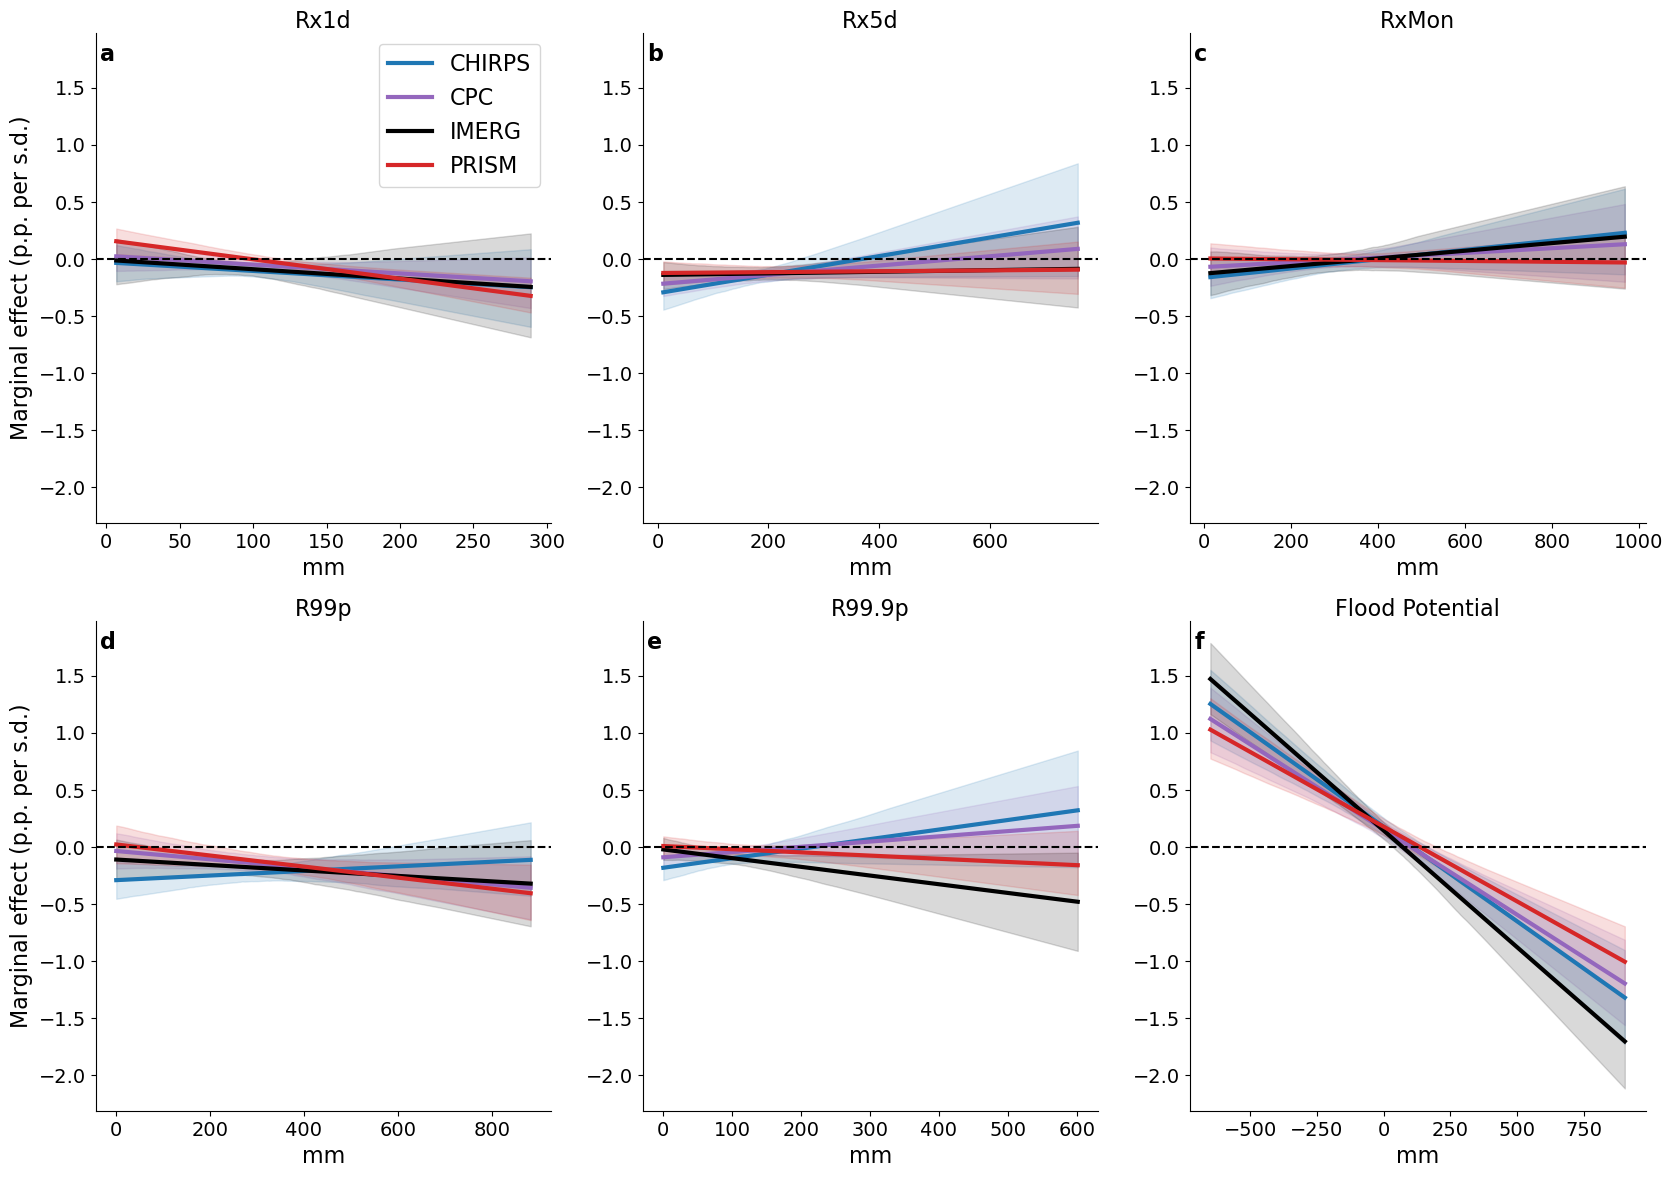

In [11]:
import matplotlib.gridspec as gridspec
plt.rcParams.update({'font.size': 16})
plt.rc('xtick', labelsize=14) # Set x-axis tick label size
plt.rc('ytick', labelsize=14) # Set y-axis tick label size

colors = ['tab:blue','tab:purple','black','tab:red']
prod_labels = ['CHIRPS','CPC','IMERG','PRISM']
fig = plt.figure(figsize=(20,14))
gs = gridspec.GridSpec(nrows=2,ncols=3,figure=fig)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1],sharey=ax1)
ax3 = plt.subplot(gs[2],sharey=ax1)
ax4 = plt.subplot(gs[3],sharey=ax1)
ax5 = plt.subplot(gs[4],sharey=ax1)
ax6 = plt.subplot(gs[5],sharey=ax1)
for i,p in enumerate(ppt_prods):
    ax1.plot(rx1d_pct,stddevs['rx1d']*rx1d_me0[p].mean(axis=0),color=colors[i],label=prod_labels[i],lw=3)
    ax1.fill_between(rx1d_pct,
                     stddevs['rx1d']*np.quantile(rx1d_me0[p],0.025,axis=0),
                     stddevs['rx1d']*np.quantile(rx1d_me0[p],0.975,axis=0),
                     color=colors[i],alpha=0.15)

    ax2.plot(rx5d_pct,stddevs['rx5d']*rx5d_me0[p].mean(axis=0),color=colors[i],lw=3)
    ax2.fill_between(rx5d_pct,
                     stddevs['rx5d']*np.quantile(rx5d_me0[p],0.025,axis=0),
                     stddevs['rx5d']*np.quantile(rx5d_me0[p],0.975,axis=0),
                     color=colors[i],alpha=0.15)

    ax3.plot(rxmon_pct,stddevs['rxmon']*rxmon_me0[p].mean(axis=0),color=colors[i],lw=3)
    ax3.fill_between(rxmon_pct,
                     stddevs['rxmon']*np.quantile(rxmon_me0[p],0.025,axis=0),
                     stddevs['rxmon']*np.quantile(rxmon_me0[p],0.975,axis=0),
                     color=colors[i],alpha=0.15)
    
    ax4.plot(r99p_pct,stddevs['r99p']*r99p_me0[p].mean(axis=0),color=colors[i],lw=3)
    ax4.fill_between(r99p_pct,
                     stddevs['r99p']*np.quantile(r99p_me0[p],0.025,axis=0),
                     stddevs['r99p']*np.quantile(r99p_me0[p],0.975,axis=0),
                     color=colors[i],alpha=0.15)
    
    ax5.plot(r99p9_pct,stddevs['r99p9']*r99p9_me0[p].mean(axis=0),color=colors[i],lw=3)
    ax5.fill_between(r99p9_pct,
                     stddevs['r99p9']*np.quantile(r99p9_me0[p],0.025,axis=0),
                     stddevs['r99p9']*np.quantile(r99p9_me0[p],0.975,axis=0),
                     color=colors[i],alpha=0.15)
    
    ax6.plot(pexc_pct,stddevs['p_exc_rxmon']*pexc_me0[p].mean(axis=0),color=colors[i],lw=3)
    ax6.fill_between(pexc_pct,
                     stddevs['p_exc_rxmon']*np.quantile(pexc_me0[p],0.025,axis=0),
                     stddevs['p_exc_rxmon']*np.quantile(pexc_me0[p],0.975,axis=0),
                     color=colors[i],alpha=0.15)

ax1.legend()
titles = ['Rx1d','Rx5d','RxMon','R99p','R99.9p','Flood Potential']
labels = ['a','b','c','d','e','f']
for i,ax in enumerate([ax1,ax2,ax3,ax4,ax5,ax6]):
    ax.axhline(0,color='black',linestyle='--')
    ax.set_xlabel("mm")
    ax.text(0.5,1,titles[i],ha='center',va='bottom',transform=ax.transAxes)
    ax.text(0.01,0.98,labels[i],ha='left',va='top',fontsize=16,fontweight='bold',transform=ax.transAxes)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    if i%3==0:
        ax.set_ylabel("Marginal effect (p.p. per s.d.)")
plt.savefig(os.path.join(project_dir,'figures','supp_mat','dmg_func_precip_measures.png'),bbox_inches='tight',dpi=350)
plt.savefig(os.path.join(project_dir,'figures','supp_mat','dmg_func_precip_measures.pdf'),bbox_inches='tight',dpi=350)
plt.show()    